# Use of the external calibration method for quantifying water content of glasses from Raman spectra

For predicting the water content from Raman spectra, a method called external calibration can be used. This method is based on Thomas et al. (2008).
This method consists in using a reference glass spectrum with known water content to calculate the water content of a glass spectrum of interest. It relies on the proportionality relation between the water content of a glass and the water peak area of its spectrum. With the calcuation of the water peak areas for both interest and reference spectra, and knowing the water content of the reference, it is then possible to simply calculate the water content of the spectrum of interest using a cross-multiplication :

$$ water = \frac{water_{ref} * A_{water \, peak}}{A_{water \, peak, \, ref}}$$

This notebook presents this external calibration method, which is implemented in the rameau module of rampy.

The spectra used for the example are mesured on standards glasses released in Mercier et al.(2009) .


# First step: dependencies & library call

Dependencies: the dependencies are very common, at the exception of rampy that can be installed through pip. 
The dependencies list is:
    - numpy
    - matplotlib
    - pandas
    - xlrd
    - rampy (install it in a console with 'pip install rampy')
    
Remark: plots use a LaTex fontend, so if you don't have one, it will probably fail.


## See the examples in the rampy repository on Github for further details on the use of Rampy. 

Address is https://github.com/charlesll/rampy

Please consult regularly the rampy Github, as this package is under active development.


## If needing help for a particular function/class, just type help(my_function) in python to print the function/class help


## References

S.-M. Thomas, R. Thomas, P. Davidson, P. Reichart, M. Koch-Muller, G. Dollinger, Application of Raman Spectroscopy to Quantify Trace Water Concentrations in Glasses and Garnets. American Mineralogist 2008, 93 (10), 1550–1557. https://doi.org/10.2138/am.2008.2834.

M. Mercier, A. Di Muro, D. Giordano, N. Métrich, P. Lesne, et al., Influence of glass polymerisation and oxidation on micro-Raman water analysis in alumino-silicate glasses. Geochimica et Cosmochimica Acta, 2009, 73 (1), pp.197-217. ⟨10.1016/j.gca.2008.09.030⟩.

In [1]:
########## Calling relevant libraries ##########
%matplotlib inline
import numpy as np
from sklearn.metrics import mean_squared_error

# Setting matplotlib options for this notebook
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


import pandas as pd
#import gcvspline
import rampy as rp

# Import of the dataset

An Excel file containing the information about the data can be used, see the provided spreadsheet as an example. The file dataset.xlsx contains four tabs with information for the datasets.

For this example, we'll use the fourth tab containing spectra of hydrated standard glasses that were released and described in Mercier et al. (2009).

In [4]:
# Data treatment
data_liste_stds = pd.read_excel("dataset.xlsx", sheet_name="2022_BB_standards_bis")

# Treatment of the dataset

To use this method you need to have a reference spectrum for each spectrum on which you want to predict the water content. Each spectrum has to be mesured in the same conditions as its reference, in a short period of time. The reference spectrum must be of a composition with a known water content. Because of that, `data_liste` must contain two columns 'Ref' and 'Water Ref' for the reference spectra and their water content respectively.

Using rameau module, only two steps are necessary to caculate the water content, because the external calibration applies on raw spectra:

- creation of the rameau object:

`rameau_object = rp.rameau(data_liste)`

- prediction of water content and areas:

`water_ext, areas, areas_ref = rameau_object.external_calibration()`

The method `external_calibration()` returns the water content of the spectra but also the water peak areas of the samples and their references, used for the calculation of the water content.


gcvspline module not found. Please install it and check it works (requires a FORTRAN compiler).


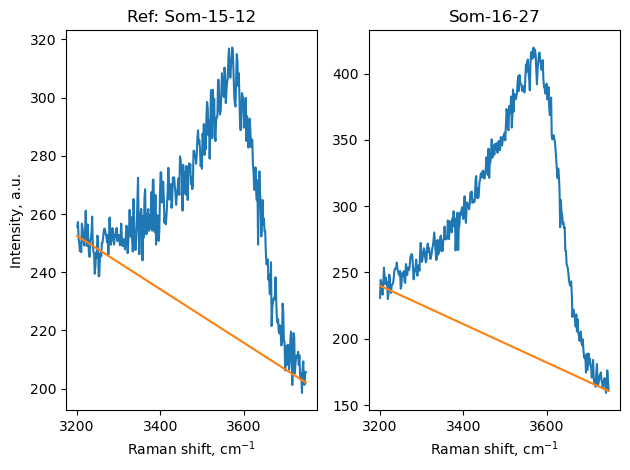

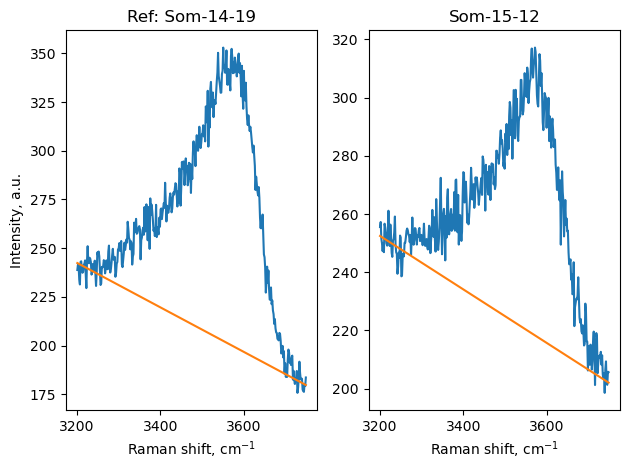

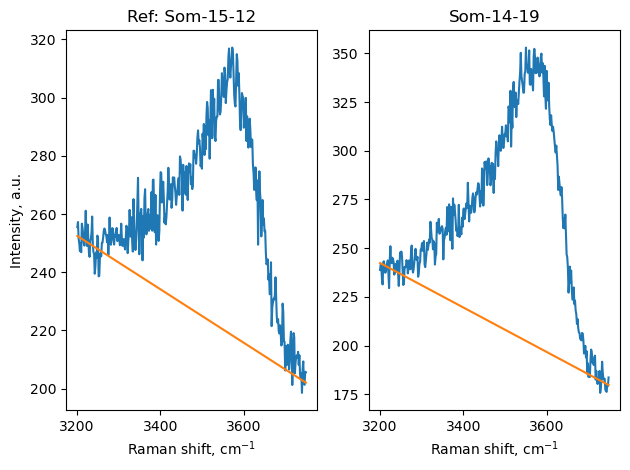

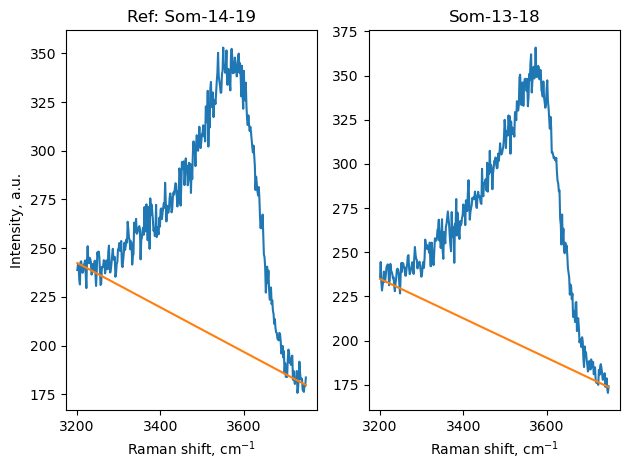

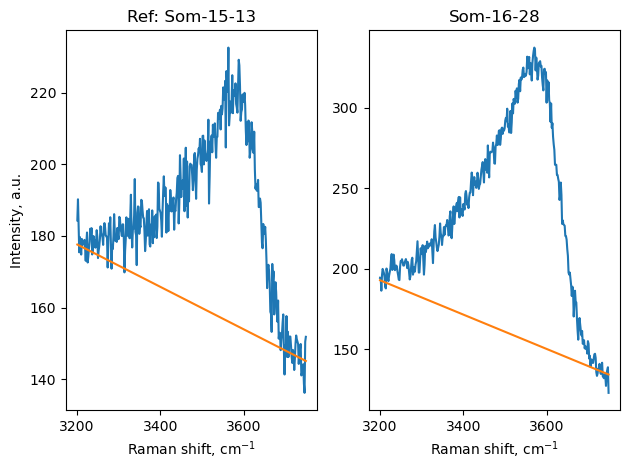

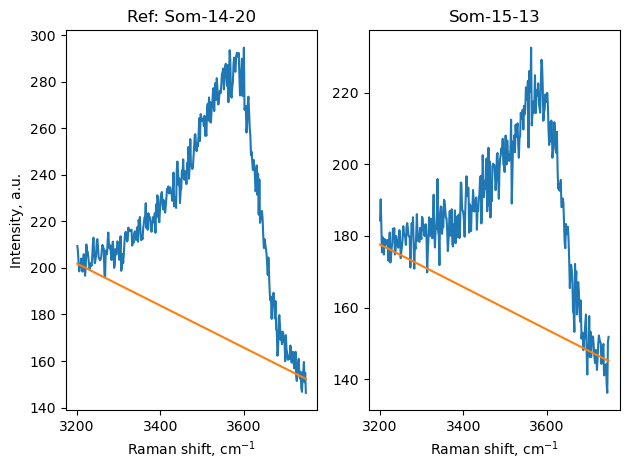

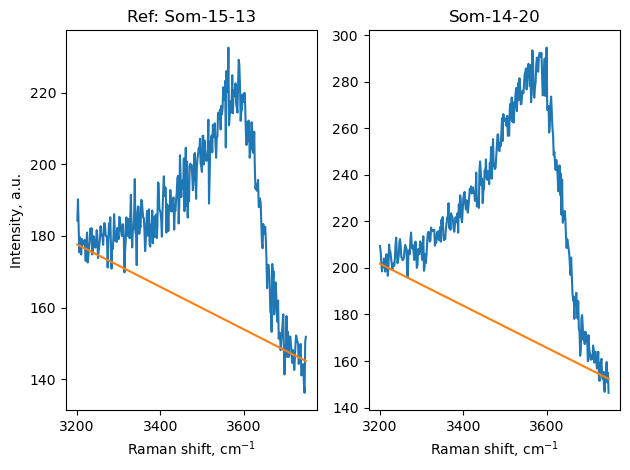

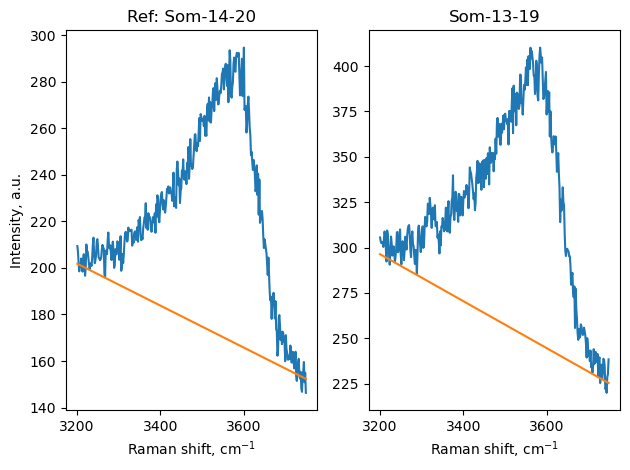

In [5]:
#
# treatment of the dataset
#

stds_2022 = rp.rameau(data_liste_stds)

wat_ext, areas, areas_ref = stds_2022.external_calibration(roi=np.array([[3190, 3200],[3750, 3760]]), path_ref='./raw/', show_fig=True)

In [6]:
# The dataset on which the predictions were performed actually had known water contents.
# We can then calculate the error between the true water content and the predictions
# to verify the accuracy of the calibration

print('RMSE is:', np.sqrt(np.mean((stds_2022.data_liste['Water, wt%'] - wat_ext)**2)))

RMSE is: 0.23688077169749333


## Figure

Comparison of the known water content of the glass standards  with the Raman calculated values following the external calibration method.

Standard deviation is: 0.24


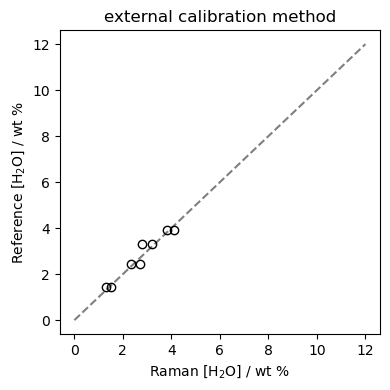

In [7]:
# Figure

RMSE_ext = np.sqrt(mean_squared_error(stds_2022.data_liste['Water, wt%'], wat_ext))

print('Standard deviation is: '+str(np.round(RMSE_ext,2)))

plt.figure(figsize=(4,4))

plt.plot(wat_ext, stds_2022.data_liste['Water, wt%'], "o", mfc="none", mec="k")

plt.plot([0,12],[0,12],"k--",alpha=0.5)
plt.xlabel(r"Raman [H$_2$O] / wt $\%$")
plt.ylabel(r"Reference [H$_2$O] / wt $\%$")
plt.title("external calibration method")


plt.tight_layout()

plt.savefig("./Figure_ext.pdf")